In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mturk = pd.read_csv('Social distancing and face mask usage (MTurk) (Responses) - Form Responses 1.csv').drop(
    columns = ['Double check: Which country are you in right now? (please type)',
               'In February, which country were you in?',
               'If your country is different to the country your MTurk '+
               'account is registered in, please type in the country '+
               'you are in right now',
               'Reason',
               'Timestamp',
               'What is your worker ID?'])
mturk.columns = pd.MultiIndex.from_tuples([('country','country'),
                              ('distancing','2020-03-03'),
                              ('distancing','2020-03-10'),
                              ('distancing','2020-03-17'),
                              ('distancing','2020-03-24'),
                              ('distancing','2020-03-31'),
                              ('masks','2020-03-03'),
                              ('masks','2020-03-10'),
                              ('masks','2020-03-17'),
                              ('masks','2020-03-24'),
                              ('masks','2020-03-31'),
                              ('flag','')])
volunteers = pd.read_csv('Physical distancing and face mask usage (Responses) - Form Responses 1.csv').drop(
    columns = ['Timestamp',
               'Unnamed: 10'])
volunteers.columns = pd.MultiIndex.from_tuples([('country','country'),
                              ('distancing','2020-03-03'),
                              ('distancing','2020-03-10'),
                              ('distancing','2020-03-17'),
                              ('distancing','2020-03-24'),
                              ('masks','2020-03-03'),
                              ('masks','2020-03-10'),
                              ('masks','2020-03-17'),
                              ('masks','2020-03-24'),
                              ('distancing','2020-03-31'),
                              ('masks','2020-03-31')])


RESPONSES = {'The same number of people as usual':100,
             '25% less people than usual':75,
             '50% less people than usual':50,
             '75% less people than usual':25,
             'Almost nobody was out in public':5,
             'Almost everybody was not wearing a mask':5,
             '25% of people wore a mask':25,
             '50% of people wore a mask':50,
             '75% of people wore a mask':75,
             'Everybody was wearing a mask':95,
             '75% of the usual number':75,
             '50% of the usual number':50,
             '25% of the usual number':25,
             "I didn't go out during this week/don't remember":np.nan,
             "I didn't go out during this week":np.nan,
             "I didn't go out this week/don't remember":np.nan,
             np.nan:np.nan}

def str2quant(s):
    return RESPONSES[s]
volunteers.loc[:,['distancing','masks']] = volunteers[['distancing','masks']].applymap(str2quant)
mturk.loc[:,['distancing','masks']] = mturk[['distancing','masks']].applymap(str2quant)
mturk = mturk[pd.isna(mturk['flag'])].drop(columns=['flag'])
both = pd.concat([volunteers,mturk],ignore_index=True).reset_index()

/home/guest/.local/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [3]:
def std_error(df):
    av = (df.groupby(('country','country')).std()*np.sqrt(df.groupby(('country','country')).count()/(df.groupby(('country','country')).count()-1))).mean().mean()
    den = np.maximum(1,np.sqrt(df.groupby(('country','country')).count()-1))
    return (df.groupby(('country','country')).std().fillna(av)/den)

In [5]:
std_error(both).max(1)

/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(country, country)
Argentina                                       88.388348
Australia                                        7.781836
Belgium                                         22.734462
Brazil                                           4.837088
Canada                                          17.320508
Czechia                                         26.061892
Denmark                                         22.734462
Estonia                                         22.734462
France                                          21.382326
Germany                                         16.962440
India                                           10.925376
Ireland                                         22.734462
Japan                                          102.530483
Jordan                                          49.497475
Kenya                                            0.707107
Luxembourg                                      22.734462
Netherlands                                     22.73

In [6]:
masks = pd.melt(both[['country','masks']],col_level=1,id_vars='country',var_name='date')
masks['date'] = pd.to_datetime(masks['date'])

a=std_error(both).max(1)
subset = list(a.index[a<21]) + ['Czechia','Slovakia']

/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


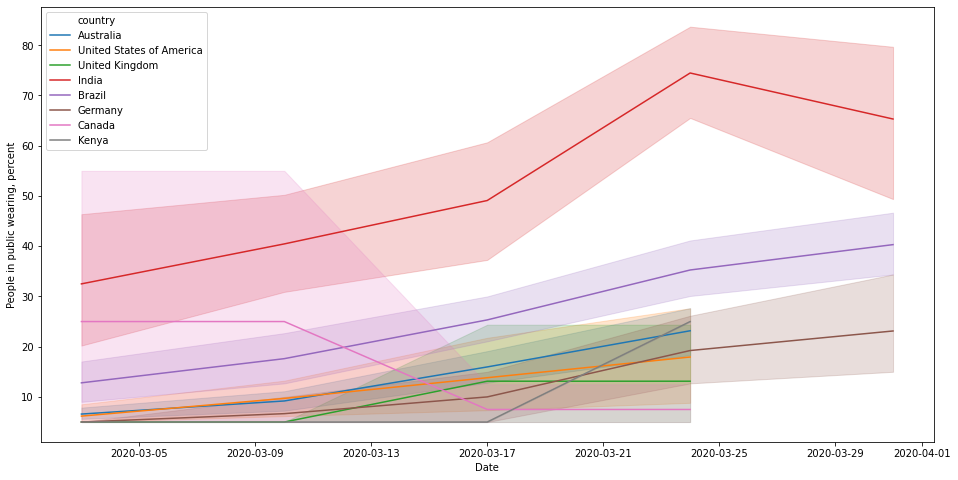

In [17]:
indices = masks['country'].isin(subset)

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=masks[indices],x='date',y='value',hue='country',ax=ax)
ax.set_ylabel('People in public wearing, percent')
ax.set_xlabel('Date')
plt.savefig('/home/guest/Documents/mask_usage.png')

In [120]:
indices = masks['country'].isin(subset)

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=masks[indices],x='date',y='value',hue='country',ax=ax)

plt.savefig('/home/guest/Documents/mask_usage.png')

array(['Australia', 'United States of America', 'Estonia',
       'United Kingdom', 'Singapore', 'Czechia', 'France', 'India',
       'Spain', 'Brazil', 'Switzerland', 'Germany', 'Argentina',
       'Romania', 'United States of America - California',
       'United Arab Emirates', 'Canada', 'Belgium',
       'United States of America - Texas',
       'United States of America - All other states', 'Jordan', 'Russia',
       'United States of America - New York',
       'United States of America - Ohio', 'Japan',
       'United States of America - Illinois',
       'United States of America - Florida', 'Sri Lanka', 'Sweden',
       'Slovakia', 'Ireland', 'Luxembourg',
       'United States of America - North Carolina',
       'United States of America - Pennsylvania',
       'United States of America - Georgia', 'South Africa', 'Kenya',
       'Netherlands', 'Pakistan', 'New Zealand', 'South Korea',
       'North Cyprus', 'Denmark'], dtype=object)

In [9]:
masks[masks['country']=='Brazil'].groupby('date').mean()

,value
date,
2020-03-03,12.803030
2020-03-10,17.615385
2020-03-17,25.327869
2020-03-24,35.263158
2020-03-31,40.312500


In [11]:
distance = pd.melt(both[['country','distancing']],col_level=1,id_vars='country',var_name='date')
distance['date'] = pd.to_datetime(distance['date'])

In [12]:
distance[distance['country']=='Brazil'].groupby('date').mean()

,value
date,
2020-03-03,83.030303
2020-03-10,67.461538
2020-03-17,42.258065
2020-03-24,28.679245
2020-03-31,28.265306


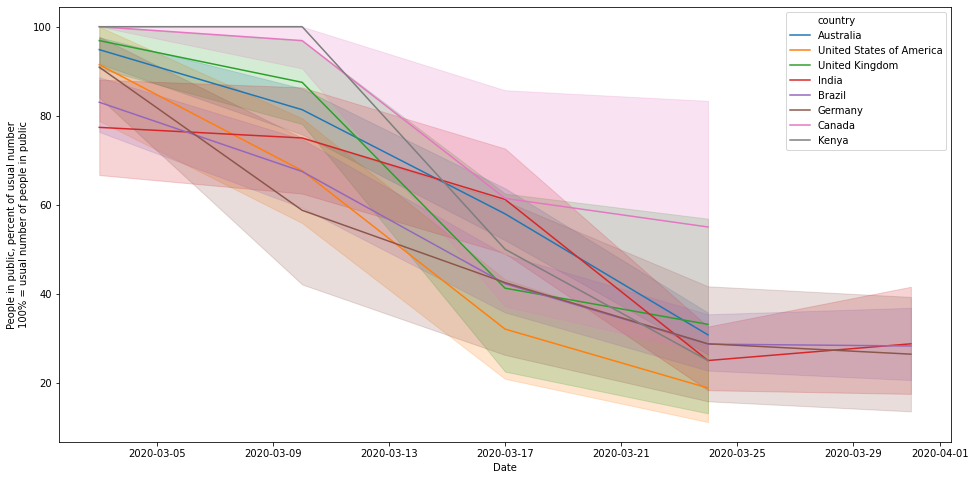

In [21]:

subset = list(a.index[a<21])
indices = distance['country'].isin(subset)


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=distance[indices],x='date',y='value',hue='country',ax=ax)
ax.set_ylabel('People in public, percent of usual number\n100% = usual number of people in public')
ax.set_xlabel('Date')
plt.savefig('/home/guest/Documents/social_distance.png')

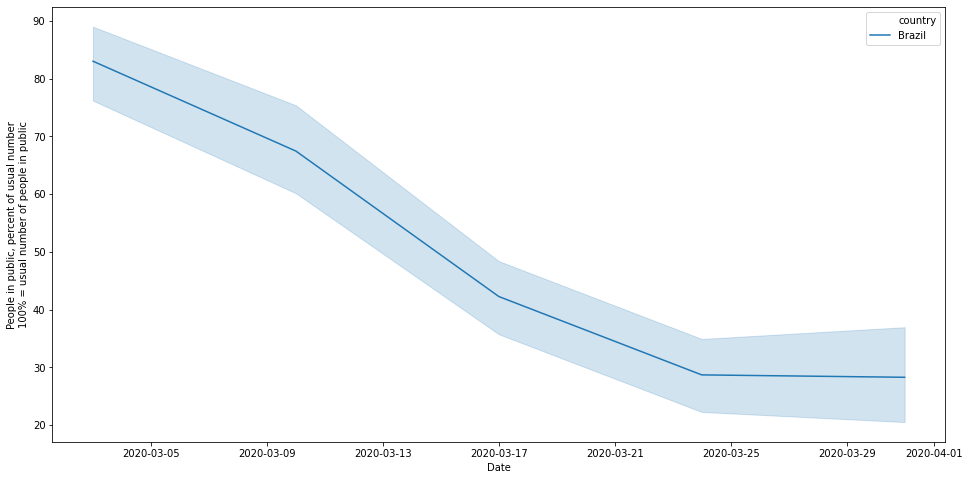

In [22]:
indices = distance['country'].isin(['Brazil'])


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=distance[indices],x='date',y='value',hue='country',ax=ax)
ax.set_ylabel('People in public, percent of usual number\n100% = usual number of people in public')
ax.set_xlabel('Date')
plt.savefig('/home/guest/Documents/social_distance_brazil.png')